<a href="https://colab.research.google.com/github/tjdmstj/Chapter-5/blob/main/chapter05_fundamentals_of_ml_i%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This is a companion notebook for the book [Deep Learning with Python, Second Edition](https://www.manning.com/books/deep-learning-with-python-second-edition?a_aid=keras&a_bid=76564dff). For readability, it only contains runnable code blocks and section titles, and omits everything else in the book: text paragraphs, figures, and pseudocode.

**If you want to be able to follow what's going on, I recommend reading the notebook side by side with your copy of the book.**

This notebook was generated for TensorFlow 2.6.

# Fundamentals of machine learning

## Generalization: The goal of machine learning

### Underfitting and overfitting

#### Noisy training data

#### Ambiguous features

#### Rare features and spurious correlations

**Adding white-noise channels or all-zeros channels to MNIST**

In [1]:
from tensorflow.keras.datasets import mnist
import numpy as np

(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

train_images_with_noise_channels = np.concatenate(
    [train_images, np.random.random((len(train_images), 784))], axis=1)

train_images_with_zeros_channels = np.concatenate(
    [train_images, np.zeros((len(train_images), 784))], axis=1)

11501568/11490434 [==============================] - 0s 0us/step


In [16]:
train_images.shape

(60000, 784)

In [17]:
(len(train_images),784)

(60000, 784)

In [19]:
np.zeros((len(train_images), 784))

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

**Training the same model on MNIST data with noise channels or all-zero channels**

In [2]:
from tensorflow import keras
from tensorflow.keras import layers

def get_model():
    model = keras.Sequential([
        layers.Dense(512, activation="relu"),
        layers.Dense(10, activation="softmax")
    ])
    model.compile(optimizer="rmsprop",
                  loss="sparse_categorical_crossentropy",
                  metrics=["accuracy"])
    return model

model = get_model()
history_noise = model.fit(
    train_images_with_noise_channels, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2)

model = get_model()
history_zeros = model.fit(
    train_images_with_zeros_channels, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 6s 7ms/step - loss: 0.6175 - accuracy: 0.8126 - val_loss: 0.2538 - val_accuracy: 0.9245
Epoch 2/10
375/375 [==============================] - 2s 5ms/step - loss: 0.2459 - accuracy: 0.9229 - val_loss: 0.2012 - val_accuracy: 0.9377
Epoch 3/10
375/375 [==============================] - 2s 6ms/step - loss: 0.1621 - accuracy: 0.9502 - val_loss: 0.1595 - val_accuracy: 0.9553
Epoch 4/10
375/375 [==============================] - 2s 4ms/step - loss: 0.1175 - accuracy: 0.9639 - val_loss: 0.1815 - val_accuracy: 0.9430
Epoch 5/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0853 - accuracy: 0.9728 - val_loss: 0.1756 - val_accuracy: 0.9483
Epoch 6/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0637 - accuracy: 0.9799 - val_loss: 0.1612 - val_accuracy: 0.9537
Epoch 7/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0464 - accuracy: 0.9853 - val_loss: 0.1323 - val_accuracy: 0.9634
Epoch 

**Plotting a validation accuracy comparison**

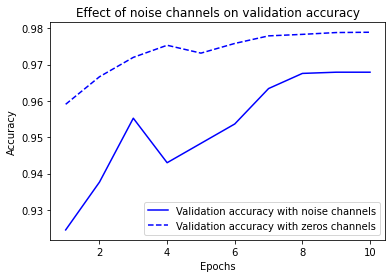

In [3]:
import matplotlib.pyplot as plt
val_acc_noise = history_noise.history["val_accuracy"]
val_acc_zeros = history_zeros.history["val_accuracy"]
epochs = range(1, 11)
plt.plot(epochs, val_acc_noise, "b-",
         label="Validation accuracy with noise channels")
plt.plot(epochs, val_acc_zeros, "b--",
         label="Validation accuracy with zeros channels")
plt.title("Effect of noise channels on validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

In [21]:
model = get_model()
history1 = model.fit(
    train_images, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2)

ValueError: ignored

In [20]:
import matplotlib.pyplot as plt
val_acc= history1.history["val_accuracy"]
val_acc_zeros = history_zeros.history["val_accuracy"]
epochs = range(1, 11)
plt.plot(epochs, val_acc_noise, "b-",
         label="Validation accuracy with origin data")
plt.plot(epochs, val_acc_zeros, "b--",
         label="Validation accuracy with zeros channels")
plt.title("Effect of noise channels on validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

NameError: ignored

### The nature of generalization in deep learning

**Fitting a MNIST model with randomly shuffled labels**

In [4]:
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

random_train_labels = train_labels[:]
np.random.shuffle(random_train_labels)

model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, random_train_labels,
          epochs=100,
          batch_size=128,
          validation_split=0.2)

Epoch 1/100
375/375 [==============================] - 2s 4ms/step - loss: 2.3152 - accuracy: 0.1028 - val_loss: 2.3086 - val_accuracy: 0.0993
Epoch 2/100
375/375 [==============================] - 1s 3ms/step - loss: 2.2995 - accuracy: 0.1164 - val_loss: 2.3174 - val_accuracy: 0.1037
Epoch 3/100
375/375 [==============================] - 1s 3ms/step - loss: 2.2904 - accuracy: 0.1248 - val_loss: 2.3193 - val_accuracy: 0.1033
Epoch 4/100
375/375 [==============================] - 1s 3ms/step - loss: 2.2768 - accuracy: 0.1391 - val_loss: 2.3268 - val_accuracy: 0.1007
Epoch 5/100
375/375 [==============================] - 1s 3ms/step - loss: 2.2596 - accuracy: 0.1521 - val_loss: 2.3350 - val_accuracy: 0.1028
Epoch 6/100
375/375 [==============================] - 1s 3ms/step - loss: 2.2389 - accuracy: 0.1685 - val_loss: 2.3529 - val_accuracy: 0.1004
Epoch 7/100
375/375 [==============================] - 1s 3ms/step - loss: 2.2140 - accuracy: 0.1811 - val_loss: 2.3850 - val_accuracy: 0.0982

#### The manifold hypothesis

#### Interpolation as a source of generalization

#### Why deep learning works

#### Training data is paramount

## Evaluating machine-learning models

### Training, validation, and test sets

#### Simple hold-out validation

#### K-fold validation

#### Iterated K-fold validation with shuffling

### Beating a common-sense baseline

### Things to keep in mind about model evaluation

## Improving model fit

### Tuning key gradient descent parameters

**Training a MNIST model with an incorrectly high learning rate**

In [5]:
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer=keras.optimizers.RMSprop(1.),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=10,
          batch_size=128,
          validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 2s 4ms/step - loss: 701.3910 - accuracy: 0.3832 - val_loss: 2.2474 - val_accuracy: 0.2049
Epoch 2/10
375/375 [==============================] - 1s 3ms/step - loss: 3.6999 - accuracy: 0.2527 - val_loss: 2.2765 - val_accuracy: 0.2330
Epoch 3/10
375/375 [==============================] - 1s 3ms/step - loss: 2.8781 - accuracy: 0.2154 - val_loss: 2.3085 - val_accuracy: 0.1806
Epoch 4/10
375/375 [==============================] - 1s 3ms/step - loss: 2.9314 - accuracy: 0.2396 - val_loss: 2.1460 - val_accuracy: 0.2393
Epoch 5/10
375/375 [==============================] - 1s 3ms/step - loss: 2.5310 - accuracy: 0.2403 - val_loss: 2.0652 - val_accuracy: 0.2387
Epoch 6/10
375/375 [==============================] - 1s 3ms/step - loss: 2.7426 - accuracy: 0.2331 - val_loss: 2.1170 - val_accuracy: 0.1942
Epoch 7/10
375/375 [==============================] - 1s 3ms/step - loss: 2.4749 - accuracy: 0.2523 - val_loss: 2.3069 - val_accuracy: 0.2550
Epoc

**The same model with a more appropriate learning rate**

In [6]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer=keras.optimizers.RMSprop(1e-2),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=10,
          batch_size=128,
          validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 2s 4ms/step - loss: 0.3948 - accuracy: 0.9075 - val_loss: 0.1531 - val_accuracy: 0.9617
Epoch 2/10
375/375 [==============================] - 1s 3ms/step - loss: 0.1416 - accuracy: 0.9632 - val_loss: 0.2005 - val_accuracy: 0.9543
Epoch 3/10
375/375 [==============================] - 1s 3ms/step - loss: 0.1168 - accuracy: 0.9730 - val_loss: 0.1618 - val_accuracy: 0.9678
Epoch 4/10
375/375 [==============================] - 1s 3ms/step - loss: 0.1047 - accuracy: 0.9766 - val_loss: 0.2093 - val_accuracy: 0.9664
Epoch 5/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0934 - accuracy: 0.9814 - val_loss: 0.2200 - val_accuracy: 0.9679
Epoch 6/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0821 - accuracy: 0.9844 - val_loss: 0.2392 - val_accuracy: 0.9706
Epoch 7/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0733 - accuracy: 0.9863 - val_loss: 0.2304 - val_accuracy: 0.9726
Epoch 

### Leveraging better architecture priors

### Increasing model capacity

**A simple logistic regression on MNIST**

In [7]:
model = keras.Sequential([layers.Dense(10, activation="softmax")])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history_small_model = model.fit(
    train_images, train_labels,
    epochs=20,
    batch_size=128,
    validation_split=0.2)

Epoch 1/20
375/375 [==============================] - 1s 3ms/step - loss: 0.6587 - accuracy: 0.8414 - val_loss: 0.3561 - val_accuracy: 0.9069
Epoch 2/20
375/375 [==============================] - 1s 3ms/step - loss: 0.3501 - accuracy: 0.9039 - val_loss: 0.3088 - val_accuracy: 0.9137
Epoch 3/20
375/375 [==============================] - 1s 3ms/step - loss: 0.3150 - accuracy: 0.9130 - val_loss: 0.2902 - val_accuracy: 0.9196
Epoch 4/20
375/375 [==============================] - 1s 3ms/step - loss: 0.2989 - accuracy: 0.9166 - val_loss: 0.2816 - val_accuracy: 0.9215
Epoch 5/20
375/375 [==============================] - 1s 2ms/step - loss: 0.2894 - accuracy: 0.9195 - val_loss: 0.2755 - val_accuracy: 0.9256
Epoch 6/20
375/375 [==============================] - 1s 3ms/step - loss: 0.2827 - accuracy: 0.9216 - val_loss: 0.2744 - val_accuracy: 0.9218
Epoch 7/20
375/375 [==============================] - 1s 3ms/step - loss: 0.2778 - accuracy: 0.9227 - val_loss: 0.2701 - val_accuracy: 0.9258
Epoch 

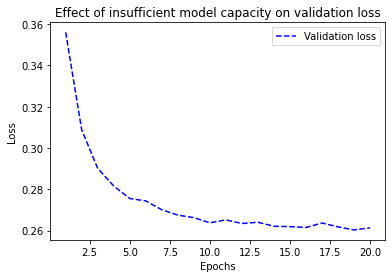

In [8]:
import matplotlib.pyplot as plt
val_loss = history_small_model.history["val_loss"]
epochs = range(1, 21)
plt.plot(epochs, val_loss, "b--",
         label="Validation loss")
plt.title("Effect of insufficient model capacity on validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

In [9]:
model = keras.Sequential([
    layers.Dense(96, activation="relu"),
    layers.Dense(96, activation="relu"),
    layers.Dense(10, activation="softmax"),
])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history_large_model = model.fit(
    train_images, train_labels,
    epochs=20,
    batch_size=128,
    validation_split=0.2)

Epoch 1/20
375/375 [==============================] - 2s 3ms/step - loss: 0.3577 - accuracy: 0.8999 - val_loss: 0.1865 - val_accuracy: 0.9444
Epoch 2/20
375/375 [==============================] - 1s 3ms/step - loss: 0.1591 - accuracy: 0.9527 - val_loss: 0.1382 - val_accuracy: 0.9598
Epoch 3/20
375/375 [==============================] - 1s 3ms/step - loss: 0.1123 - accuracy: 0.9661 - val_loss: 0.1216 - val_accuracy: 0.9643
Epoch 4/20
375/375 [==============================] - 1s 3ms/step - loss: 0.0874 - accuracy: 0.9731 - val_loss: 0.1029 - val_accuracy: 0.9704
Epoch 5/20
375/375 [==============================] - 1s 3ms/step - loss: 0.0705 - accuracy: 0.9788 - val_loss: 0.1004 - val_accuracy: 0.9714
Epoch 6/20
375/375 [==============================] - 1s 3ms/step - loss: 0.0581 - accuracy: 0.9819 - val_loss: 0.0939 - val_accuracy: 0.9737
Epoch 7/20
375/375 [==============================] - 1s 3ms/step - loss: 0.0483 - accuracy: 0.9853 - val_loss: 0.0979 - val_accuracy: 0.9722
Epoch 

## Improving generalization

### Dataset curation

### Feature engineering

### Using early stopping

### Regularizing your model

#### Reducing the network's size

**Original model**

In [10]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), _ = imdb.load_data(num_words=10000)

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results
train_data = vectorize_sequences(train_data)

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_original = model.fit(train_data, train_labels,
                             epochs=20, batch_size=512, validation_split=0.4)

17473536/17464789 [==============================] - 0s 0us/step
Epoch 1/20
30/30 [==============================] - 2s 42ms/step - loss: 0.5786 - accuracy: 0.7347 - val_loss: 0.4566 - val_accuracy: 0.8318
Epoch 2/20
30/30 [==============================] - 1s 19ms/step - loss: 0.3621 - accuracy: 0.8938 - val_loss: 0.3478 - val_accuracy: 0.8720
Epoch 3/20
30/30 [==============================] - 1s 19ms/step - loss: 0.2597 - accuracy: 0.9210 - val_loss: 0.3213 - val_accuracy: 0.8688
Epoch 4/20
30/30 [==============================] - 1s 19ms/step - loss: 0.2012 - accuracy: 0.9383 - val_loss: 0.2737 - val_accuracy: 0.8934
Epoch 5/20
30/30 [==============================] - 1s 19ms/step - loss: 0.1644 - accuracy: 0.9482 - val_loss: 0.2792 - val_accuracy: 0.8883
Epoch 6/20
30/30 [==============================] - 1s 23ms/step - loss: 0.1356 - accuracy: 0.9589 - val_loss: 0.3031 - val_accuracy: 0.8783
Epoch 7/20
30/30 [==============================] - 1s 19ms/step - loss: 0.1145 - accurac

**Version of the model with lower capacity**

In [11]:
model = keras.Sequential([
    layers.Dense(4, activation="relu"),
    layers.Dense(4, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_smaller_model = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 1s 33ms/step - loss: 0.6015 - accuracy: 0.7393 - val_loss: 0.5110 - val_accuracy: 0.8568
Epoch 2/20
30/30 [==============================] - 1s 23ms/step - loss: 0.4434 - accuracy: 0.8786 - val_loss: 0.4157 - val_accuracy: 0.8740
Epoch 3/20
30/30 [==============================] - 1s 19ms/step - loss: 0.3498 - accuracy: 0.9050 - val_loss: 0.3496 - val_accuracy: 0.8841
Epoch 4/20
30/30 [==============================] - 1s 19ms/step - loss: 0.2838 - accuracy: 0.9196 - val_loss: 0.3166 - val_accuracy: 0.8861
Epoch 5/20
30/30 [==============================] - 1s 19ms/step - loss: 0.2383 - accuracy: 0.9300 - val_loss: 0.2937 - val_accuracy: 0.8885
Epoch 6/20
30/30 [==============================] - 1s 19ms/step - loss: 0.2045 - accuracy: 0.9402 - val_loss: 0.2779 - val_accuracy: 0.8939
Epoch 7/20
30/30 [==============================] - 1s 19ms/step - loss: 0.1770 - accuracy: 0.9491 - val_loss: 0.2724 - val_accuracy: 0.8928
Epoch 8/20
30

**Version of the model with higher capacity**

In [12]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(512, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_larger_model = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 2s 38ms/step - loss: 0.5325 - accuracy: 0.7624 - val_loss: 0.3120 - val_accuracy: 0.8711
Epoch 2/20
30/30 [==============================] - 1s 24ms/step - loss: 0.2529 - accuracy: 0.8977 - val_loss: 0.2674 - val_accuracy: 0.8943
Epoch 3/20
30/30 [==============================] - 1s 23ms/step - loss: 0.1447 - accuracy: 0.9447 - val_loss: 0.3331 - val_accuracy: 0.8854
Epoch 4/20
30/30 [==============================] - 1s 23ms/step - loss: 0.0747 - accuracy: 0.9712 - val_loss: 0.3382 - val_accuracy: 0.8873
Epoch 5/20
30/30 [==============================] - 1s 22ms/step - loss: 0.0739 - accuracy: 0.9782 - val_loss: 0.2995 - val_accuracy: 0.8848
Epoch 6/20
30/30 [==============================] - 1s 22ms/step - loss: 0.0072 - accuracy: 0.9995 - val_loss: 0.5091 - val_accuracy: 0.8871
Epoch 7/20
30/30 [==============================] - 1s 23ms/step - loss: 0.0011 - accuracy: 0.9999 - val_loss: 0.6421 - val_accuracy: 0.8863
Epoch 8/20
30

#### Adding weight regularization

**Adding L2 weight regularization to the model**

In [13]:
from tensorflow.keras import regularizers
model = keras.Sequential([
    layers.Dense(16,
                 kernel_regularizer=regularizers.l2(0.002),
                 activation="relu"),
    layers.Dense(16,
                 kernel_regularizer=regularizers.l2(0.002),
                 activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_l2_reg = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 2s 34ms/step - loss: 0.5995 - accuracy: 0.7760 - val_loss: 0.4724 - val_accuracy: 0.8713
Epoch 2/20
30/30 [==============================] - 1s 19ms/step - loss: 0.4143 - accuracy: 0.8955 - val_loss: 0.3982 - val_accuracy: 0.8874
Epoch 3/20
30/30 [==============================] - 1s 19ms/step - loss: 0.3434 - accuracy: 0.9136 - val_loss: 0.4062 - val_accuracy: 0.8685
Epoch 4/20
30/30 [==============================] - 1s 19ms/step - loss: 0.3095 - accuracy: 0.9243 - val_loss: 0.4040 - val_accuracy: 0.8686
Epoch 5/20
30/30 [==============================] - 1s 19ms/step - loss: 0.2896 - accuracy: 0.9315 - val_loss: 0.3667 - val_accuracy: 0.8880
Epoch 6/20
30/30 [==============================] - 1s 19ms/step - loss: 0.2735 - accuracy: 0.9369 - val_loss: 0.3774 - val_accuracy: 0.8802
Epoch 7/20
30/30 [==============================] - 1s 20ms/step - loss: 0.2690 - accuracy: 0.9361 - val_loss: 0.3752 - val_accuracy: 0.8824
Epoch 8/20
30

**Different weight regularizers available in Keras**

In [14]:
from tensorflow.keras import regularizers
regularizers.l1(0.001)
regularizers.l1_l2(l1=0.001, l2=0.001)

#### Adding dropout

**Adding dropout to the IMDB model**

In [15]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_dropout = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 2s 34ms/step - loss: 0.6322 - accuracy: 0.6403 - val_loss: 0.5148 - val_accuracy: 0.8454
Epoch 2/20
30/30 [==============================] - 1s 19ms/step - loss: 0.5074 - accuracy: 0.7717 - val_loss: 0.4068 - val_accuracy: 0.8716
Epoch 3/20
30/30 [==============================] - 1s 19ms/step - loss: 0.4268 - accuracy: 0.8269 - val_loss: 0.3391 - val_accuracy: 0.8842
Epoch 4/20
30/30 [==============================] - 1s 19ms/step - loss: 0.3635 - accuracy: 0.8629 - val_loss: 0.3073 - val_accuracy: 0.8846
Epoch 5/20
30/30 [==============================] - 1s 19ms/step - loss: 0.3131 - accuracy: 0.8891 - val_loss: 0.2864 - val_accuracy: 0.8881
Epoch 6/20
30/30 [==============================] - 1s 19ms/step - loss: 0.2738 - accuracy: 0.9047 - val_loss: 0.2797 - val_accuracy: 0.8867
Epoch 7/20
30/30 [==============================] - 1s 19ms/step - loss: 0.2384 - accuracy: 0.9187 - val_loss: 0.2816 - val_accuracy: 0.8898
Epoch 8/20
30

## Summary